In [6]:
import torch
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### 生成数据集

In [37]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))

In [38]:
print(features[0],labels[0])
print(features.dtype)

tensor([ 1.1192, -0.4461], dtype=torch.float64) tensor(7.9464, dtype=torch.float64)
torch.float64


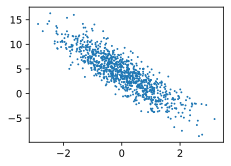

In [39]:
def use_svg_display():
    #用矢量图显示
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    #设置图的尺寸
    plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

### 读取数据

In [40]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)]) #最后一次可能不足一个batch
        yield features.index_select(0,j),labels.index_select(0,j) 

In [41]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tensor([[ 1.0703, -1.3480],
        [ 0.0447,  1.2347],
        [ 1.1603,  0.7356],
        [ 0.4829, -0.3259],
        [ 1.3342, -1.4575],
        [-1.1149, -0.4431],
        [-0.9391, -2.3026],
        [-1.1045,  0.3080],
        [-0.3241,  0.6599],
        [-1.7291, -0.8650]], dtype=torch.float64) tensor([10.9125,  0.0739,  4.0223,  6.2732, 11.8208,  3.4918, 10.1466,  0.9311,
         1.2949,  3.6898], dtype=torch.float64)


### 初始化模型参数

In [42]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float64)
b=torch.zeros(1,dtype=torch.float64)

In [43]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], dtype=torch.float64, requires_grad=True)

### 定义模型

In [44]:
def linreg(X,w,b):
    return torch.mm(X,w)+b

### 定义损失函数

In [45]:
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2 /2

### 定义优化算法

In [46]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size

### 训练模型

In [47]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_1=loss(net(features,w,b),labels)
    print('epoch %d,loss %f'%(epoch+1,train_1.mean().item()))

epoch 1,loss 0.034720
epoch 2,loss 0.000127
epoch 3,loss 0.000052


In [48]:
print(true_w,'\n',w)
print(true_b,'\n',b)

[2, -3.4] 
 tensor([[ 2.0001],
        [-3.3988]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1993], dtype=torch.float64, requires_grad=True)
